Questão 1

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Ativ_Segment/Fig1046(a)(septagon_noisy_shaded).tif',0)
h,w = img.shape # Pega a altura e largura da imagem
print(f"Altura: {h} Largura: {w}")

Altura: 651 Largura: 814


Dividindo a imagem em seis subregiões retangulares

In [ ]:
r1 = img[0:0+325, 0:0+271]

r2 = img[0:0+325, 271:271+272]

r3 = img[0:0+325, 543:543+271]

r4 = img[325:325+326, 0:0+271]

r5 = img[325:325+326, 271:271+272]

r6 = img[325:325+326, 543:543+271]

Criando um histograma para cada subregião

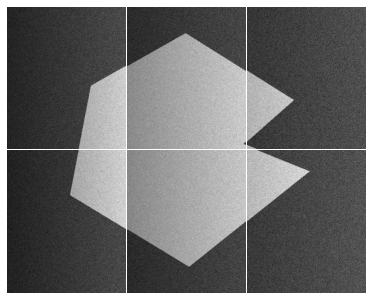

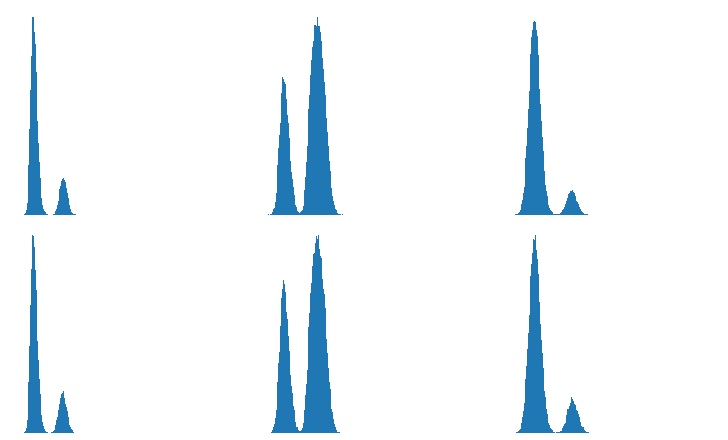

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(5,4))
fig2, ax2 = plt.subplots(2,3, figsize=(10,6),constrained_layout = True)

retangulos = [r1,r2,r3,r4,r5,r6]
n=0

for i in range(2):
  for j in range(3):
    ax[i][j].axis('off')
    ax2[i][j].axis('off')
    ax[i][j].imshow(retangulos[n], cmap='gray');
    ax2[i][j].hist(retangulos[n].ravel(),256,[0,256])
    
    n += 1
fig.tight_layout(pad=0.1)
fig.savefig('/content/drive/MyDrive/Colab Notebooks/Ativ_Segment/subregioes.png')

Aplicando a limiarização de Otsu para cada subregião

In [ ]:
ret1, thresh1 = cv.threshold(r1, 0, 255, cv.THRESH_OTSU)
ret2, thresh2 = cv.threshold(r2, 0, 255, cv.THRESH_OTSU)
ret3, thresh3 = cv.threshold(r3, 0, 255, cv.THRESH_OTSU)
ret4, thresh4 = cv.threshold(r4, 0, 255, cv.THRESH_OTSU)
ret5, thresh5 = cv.threshold(r5, 0, 255, cv.THRESH_OTSU)
ret6, thresh6 = cv.threshold(r6, 0, 255, cv.THRESH_OTSU)

Concatenando as subregiões depois de aplicar o método de Otsu

In [ ]:
ver1 = np.concatenate((thresh1, thresh4), axis=0)
ver2 = np.concatenate((thresh2, thresh5), axis=0)
ver3 = np.concatenate((thresh3, thresh6), axis=0)

hor1 = np.concatenate((ver1, ver2), axis=1)
concatenada = np.concatenate((hor1, ver3), axis=1)

### Resultado Final
Comparando os resultados obtidos utilizando limiarização global simples, método de Otsu e limiarização variável por meio de
particionamento da imagem. 

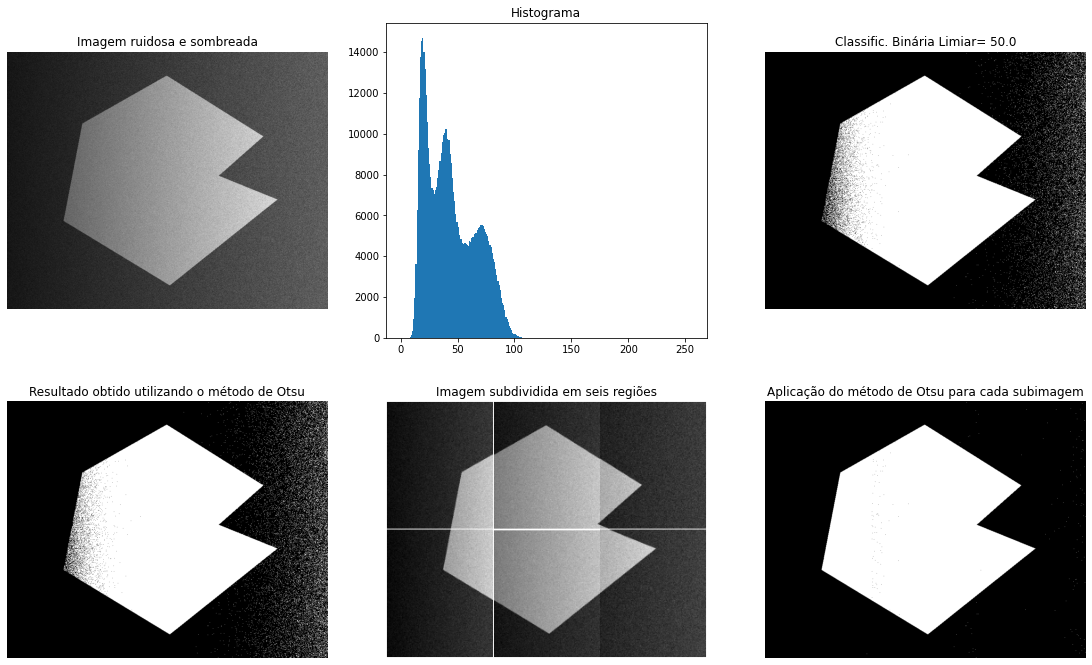

In [ ]:
subregioes = cv.imread('/content/drive/MyDrive/Colab Notebooks/Ativ_Segment/subregioes.png',0)

fig1, ax1 = plt.subplots(2,3,figsize=(16, 10))

ret7,thresh7 = cv.threshold(img,50,255,cv.THRESH_BINARY)

ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_OTSU)

ax1[0][0].imshow(img, 'gray')
ax1[0][0].set_title("Imagem ruidosa e sombreada")
ax1[0][0].axis('off')

ax1[0][1].hist(img.ravel(),256,[0,256])
ax1[0][1].set_title("Histograma")

ax1[0][2].imshow(thresh7,'gray',vmin=0,vmax=255)
ax1[0][2].set_title("Classific. Binária Limiar= " + str(ret7))
ax1[0][2].axis('off')

ax1[1][0].imshow(thresh,'gray',vmin=0,vmax=255)
ax1[1][0].set_title("Resultado obtido utilizando o método de Otsu")
ax1[1][0].axis('off')

ax1[1][1].imshow(subregioes, 'gray')
ax1[1][1].set_title("Imagem subdividida em seis regiões")
ax1[1][1].axis('off')

ax1[1][2].imshow(concatenada,'gray',vmin=0,vmax=255)
ax1[1][2].set_title("Aplicação do método de Otsu para cada subimagem")
ax1[1][2].axis('off')

fig1.tight_layout(pad=2.0)